# Performance Stats

In [1]:
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cm = 1/2.54
linewidth = 14.6979 * cm # line width in TuDa template
sns.set_theme(context='paper', style='whitegrid', palette='deep', rc={'figure.figsize':(linewidth, 10*cm)})

In [2]:
stats_base_path = Path("performance/stats/")
dtnd_spool_stats = sorted(stats_base_path.glob("dtnd-spool*"))[-1]
monntpy_ingest_stats = sorted(stats_base_path.glob("monntpy-ingest*"))[-1]
monntpy_spool_stats = sorted(stats_base_path.glob("monntpy-spool*"))[-1]
monntpy_allonline_stats = sorted(stats_base_path.glob("monntpy-allonline*"))[-1]

In [3]:
def make_table(df):
    df = df.groupby("num_articles").describe().drop("25%", axis=1, level=1).drop("75%", axis=1, level=1).rename(columns={"50%": "median"})
    df["count"] = df["elapsed"]["count"].astype("int64")
    df.drop("count", axis=1, level=1, inplace=True)
    return df.reset_index().set_index(["num_articles", "count"])

## Ingestion Performance

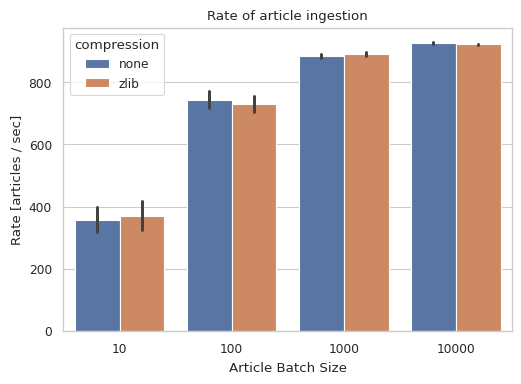

In [4]:
df_ingest = pd.read_csv(monntpy_ingest_stats, sep=";")
g = sns.barplot(data=df_ingest, x="num_articles", y="rate", hue="compression")
_ = g.set(xlabel='Article Batch Size', ylabel='Rate [articles / sec]', title="Rate of article ingestion")

# sns.despine()
# plt.savefig("figures/ch6_eval_monntpy_ingest.pdf")

In [5]:
table_ingest = make_table(df_ingest)

# with open("ch6_ingest_table.tex", "w") as fh:
#     fh.write(table_ingest.style.to_latex())

table_ingest

elapsed                                           rate  \
                         mean       std     min   median     max        mean   
num_articles count                                                             
10           100     0.031590  0.010370   0.012   0.0340   0.060  363.254900   
100          60      0.137317  0.015037   0.112   0.1380   0.175  736.602900   
1000         30      1.127567  0.017284   1.101   1.1285   1.178  887.064667   
10000        20     10.826450  0.059731  10.696  10.8180  10.973  923.689900   

                                                            
                           std      min    median      max  
num_articles count                                          
10           100    155.092032  166.666  294.1170  833.333  
100          60      78.310027  571.428  724.6370  892.857  
1000         30      13.474047  848.896  886.1315  908.265  
10000        20       5.089949  911.327  924.3850  934.928

## Spool Performance

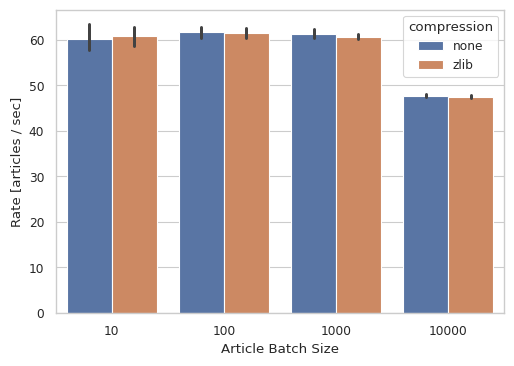

In [6]:
df_monntpy_spool = pd.read_csv(monntpy_spool_stats, sep=";")

g = sns.barplot(data=df_monntpy_spool, x="num_articles", y="rate", hue="compression")
_ = g.set(xlabel='Article Batch Size', ylabel='Rate [articles / sec]')

# plt.savefig("ch6_eval_monntpy_spool.pdf")

In [7]:
table_monntpy_spool = make_table(df_monntpy_spool)

# with open("ch6_monntpy_spool_table.tex", "w") as fh:
#     fh.write(table_monntpy_spool.style.to_latex())

table_monntpy_spool

elapsed                                        \
                         mean       std      min    median      max   
num_articles count                                                    
10           100      0.16820  0.022753    0.091    0.1655    0.263   
100          60       1.62745  0.088006    1.458    1.6250    2.004   
1000         30      16.42010  0.412451   14.637   16.4440   17.206   
10000        20     209.95420  2.181286  204.139  210.2890  212.943   

                         rate                                     
                         mean       std     min  median      max  
num_articles count                                                
10           100    60.553040  8.766840  38.022  60.423  109.890  
100          60     61.613200  3.173784  49.900  61.538   68.587  
1000         30     60.940267  1.640799  58.119  60.812   68.320  
10000        20     47.633900  0.502739  46.960  47.553   48.986

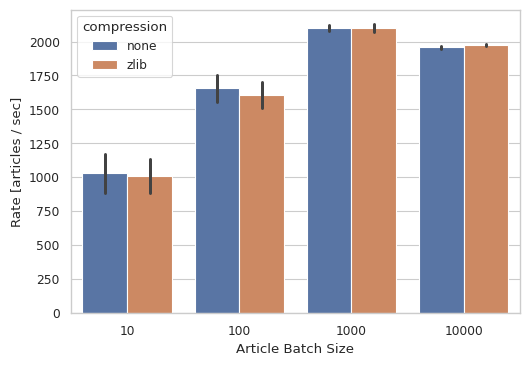

In [8]:
df_dtnd_spool = pd.read_csv(dtnd_spool_stats, sep=";")

g = sns.barplot(data=df_dtnd_spool, x="num_articles", y="rate", hue="compression")
# g = sns.barplot(data=df_dtnd_spool[df_dtnd_spool["compression"] == "none"], x="num_articles", y="rate")
_ = g.set(xlabel='Article Batch Size', ylabel='Rate [articles / sec]')

# plt.savefig("figures/ch6_eval_dtnd_spool.pdf")

In [9]:
table_dtnd_spool = make_table(df_dtnd_spool)

# with open("ch6_dtnd_spool_table.tex", "w") as fh:
#     fh.write(table_dtnd_spool.style.to_latex())

table_dtnd_spool

elapsed                                         rate  \
                        mean       std    min  median    max         mean   
num_articles count                                                          
10           100    0.012970  0.007103  0.004  0.0090  0.024  1018.688390   
100          60     0.063167  0.011237  0.048  0.0650  0.090  1630.372600   
1000         30     0.476233  0.011196  0.455  0.4795  0.494  2100.942267   
10000        20     5.087850  0.047174  5.001  5.0765  5.169  1965.626550   

                                                               
                           std       min     median       max  
num_articles count                                             
10           100    494.127929   416.666  1111.1110  2500.000  
100          60     275.327513  1111.111  1538.4610  2083.333  
1000         30      49.808091  2024.291  2085.5075  2197.802  
10000        20      18.193707  1934.610  1969.8615  1999.600

## Sequential Client Transfer Performance

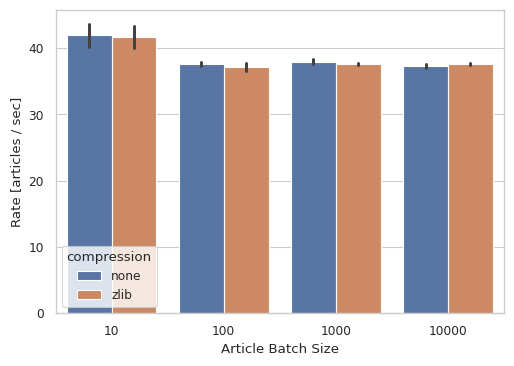

In [10]:
df_seq = pd.read_csv(monntpy_allonline_stats, sep=";")

g = sns.barplot(data=df_seq, x="num_articles", y="rate", hue="compression")
# g = sns.barplot(data=df_seq[df_seq["compression"] == "none"], x="num_articles", y="rate")
_ = g.set(xlabel='Article Batch Size', ylabel='Rate [articles / sec]')

# plt.savefig("ch6_eval_monntpy_allonline.pdf")

In [11]:
table_seq = make_table(df_seq)

# with open("ch6_seq_table.tex", "w") as fh:
#     fh.write(table_seq.style.to_latex())

table_seq

elapsed                                        \
                          mean       std      min    median      max   
num_articles count                                                     
10           100      0.246110  0.052206    0.155    0.2400    0.606   
100          60       2.675633  0.102870    2.531    2.6465    2.996   
1000         30      26.460333  0.424277   24.806   26.5080   26.978   
10000        20     267.044700  2.971473  262.770  267.2140  274.884   

                         rate                                     
                         mean       std     min   median     max  
num_articles count                                                
10           100    41.815850  6.320322  16.501  41.6660  64.516  
100          60     37.426117  1.384564  33.377  37.7850  39.510  
1000         30     37.801767  0.633151  37.067  37.7240  40.312  
10000        20     37.450850  0.413038  36.378  37.4225  38.056

In [12]:
df_seq.describe()

,num_articles,elapsed,rate
count,210.000000,210.000000,210.000000
mean,1128.571429,30.094538,39.572486
std,2904.491301,77.573189,4.913824
min,10.000000,0.155000,16.501000
25%,10.000000,0.241000,37.474000
50%,100.000000,2.562500,38.262500
75%,100.000000,2.893000,41.493000
max,10000.000000,274.884000,64.516000
